## Load Data

In [72]:
import pandas as pd

# Load the Excel file
file_path = 'data/sky_camera.xlsx'
data = pd.read_excel(file_path)


In [73]:
# Display the first few rows of the dataset
data.head()

,File Name,File Name.1,Timestamp,real GHI
0,20221031013000_0.jpg,130,1:30,0.0
1,20221031013100_0.jpg,131,1:31,0.0
2,20221031013200_0.jpg,132,1:32,0.0
3,20221031013300_0.jpg,133,1:33,0.0
4,20221031013400_0.jpg,134,1:34,0.0


In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 880 entries, 0 to 879
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   File Name    880 non-null    object 
 1   File Name.1  880 non-null    int64  
 2   Timestamp    880 non-null    object 
 3   real GHI     880 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 27.6+ KB


In [75]:
data.shape

(880, 4)

##  Preprocess the Data

In [76]:
image_path='data/images'

# Create the new 'image_path' column
data['image_path'] = data['File Name'].apply(lambda x: f'data/images/{x}')

In [77]:
data.head()

,File Name,File Name.1,Timestamp,real GHI,image_path
0,20221031013000_0.jpg,130,1:30,0.0,data/images/20221031013000_0.jpg
1,20221031013100_0.jpg,131,1:31,0.0,data/images/20221031013100_0.jpg
2,20221031013200_0.jpg,132,1:32,0.0,data/images/20221031013200_0.jpg
3,20221031013300_0.jpg,133,1:33,0.0,data/images/20221031013300_0.jpg
4,20221031013400_0.jpg,134,1:34,0.0,data/images/20221031013400_0.jpg


In [78]:
data.columns

Index(['File Name', 'File Name.1', 'Timestamp', 'real GHI', 'image_path'], dtype='object')

In [79]:
data.rename(columns={
    'File Name' : 'file_name',
    'File Name.1' : 'file_name1',
    'Timestamp': 'timestamp',
    'real GHI' : 'ghi'
}, inplace=True)

In [80]:
data.head()

,file_name,file_name1,timestamp,ghi,image_path
0,20221031013000_0.jpg,130,1:30,0.0,data/images/20221031013000_0.jpg
1,20221031013100_0.jpg,131,1:31,0.0,data/images/20221031013100_0.jpg
2,20221031013200_0.jpg,132,1:32,0.0,data/images/20221031013200_0.jpg
3,20221031013300_0.jpg,133,1:33,0.0,data/images/20221031013300_0.jpg
4,20221031013400_0.jpg,134,1:34,0.0,data/images/20221031013400_0.jpg


In [81]:
import os

# Function to check if the file exists
def check_file_existence(file_path):
    return 'Yes' if os.path.exists(file_path) else 'No'

In [82]:
# Create the new 'file_existance' column
data['file_existance'] = data['image_path'].apply(check_file_existence)

In [83]:
data.head()

,file_name,file_name1,timestamp,ghi,image_path,file_existance
0,20221031013000_0.jpg,130,1:30,0.0,data/images/20221031013000_0.jpg,Yes
1,20221031013100_0.jpg,131,1:31,0.0,data/images/20221031013100_0.jpg,Yes
2,20221031013200_0.jpg,132,1:32,0.0,data/images/20221031013200_0.jpg,Yes
3,20221031013300_0.jpg,133,1:33,0.0,data/images/20221031013300_0.jpg,Yes
4,20221031013400_0.jpg,134,1:34,0.0,data/images/20221031013400_0.jpg,Yes


In [84]:
data_filtered = data[data['file_existance'] == 'Yes']

In [85]:
data_filtered.shape

(880, 6)

In [86]:
# Find Invalid Data where no image found
invalid_data = data[data['file_existance'] == 'No']

In [87]:
data_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 880 entries, 0 to 879
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   file_name       880 non-null    object 
 1   file_name1      880 non-null    int64  
 2   timestamp       880 non-null    object 
 3   ghi             880 non-null    float64
 4   image_path      880 non-null    object 
 5   file_existance  880 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 41.4+ KB


In [88]:
# Remove outlier
def remove_outliers_iqr(df, column):
    """
    Remove outliers from a DataFrame column using the IQR method.

    Parameters:
    df (pd.DataFrame): The input DataFrame.
    column (str): The column from which to remove outliers.

    Returns:
    pd.DataFrame: DataFrame with outliers removed.
    """
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    lower_bound=0
    upper_bound=600.0
    
    df_cleaned = df[(df[column] > lower_bound) & (df[column] <= upper_bound)]
    return df_cleaned

In [89]:
data_filtered['ghi'].describe()

count    880.000000
mean     337.465337
std      296.806543
min        0.000000
25%        0.001200
50%      314.072100
75%      625.448625
max      801.920600
Name: ghi, dtype: float64

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt

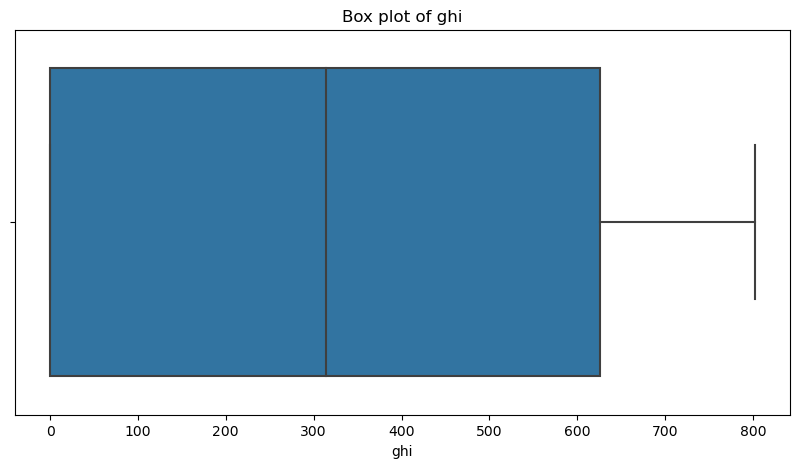

In [91]:
# Step 1: Plot a box plot
plt.figure(figsize=(10, 5))
sns.boxplot(x=data_filtered['ghi'])
plt.title('Box plot of ghi')
plt.show()

In [92]:
data_filtered = remove_outliers_iqr(data_filtered, 'ghi')

#threshold = 600
#data_filtered = data_filtered[data_filtered['ghi'] <= threshold]
 

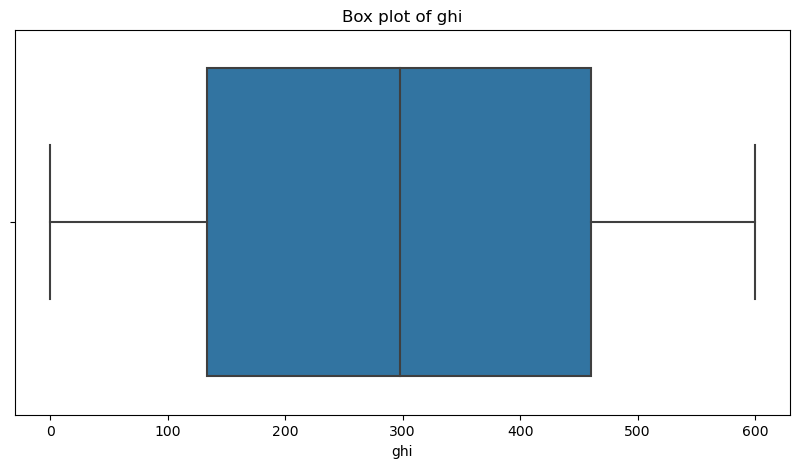

In [93]:
# Step 1: Plot a box plot
plt.figure(figsize=(10, 5))
sns.boxplot(x=data_filtered['ghi'])
plt.title('Box plot of ghi')
plt.show()

In [95]:
data_filtered['ghi'].describe()

count    418.000000
mean     290.393783
std      184.428202
min        0.001600
25%      133.817025
50%      297.719250
75%      460.416000
max      599.527000
Name: ghi, dtype: float64

In [96]:
# Save invalid data into csv
data_filtered.to_csv('data/valid_data.csv',  header=True, index=False)

# Save invalid data into csv
invalid_data.to_csv('data/invalid_data.csv',  header=True, index=False)

In [97]:
#!pip3 install opencv-python
#!pip install tensorflow

In [98]:
import numpy as np
import cv2
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [99]:
# Assuming 'data' DataFrame contains 'image_path' and 'ghi' columns
# Preprocess images and GHI values
image_size = (128, 128)  # Resize to 128x128

In [100]:
def preprocess_image(img_path):
    image = cv2.imread(img_path)
    image = cv2.resize(image, image_size)
    image = image / 255.0  # Normalize to [0, 1]
    return image

In [101]:
# Read images and GHI values
# -- features
images = np.array([preprocess_image(path) for path in data_filtered['image_path'].values])

# -- Target 
ghi_values = data_filtered['ghi'].values

In [102]:
max_ghi = ghi_values.max()

print(f"GHI Max = {max_ghi}")

# Normalize GHI values
ghi_values = ghi_values / ghi_values.max()

GHI Max = 599.527


In [103]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(images, ghi_values, test_size=0.2, random_state=42)

# shape=(128, 128, 3)
# Build a CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='linear')  # Regression output
])

model.compile(optimizer=Adam(), loss='mean_squared_error', metrics=['mae'])
model.summary()

C:\Users\obaidulhaque.sarker\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,304,769 (12.61 MB)

 Trainable params: 3,304,769 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [104]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 248ms/step - loss: 0.9953 - mae: 0.7231 - val_loss: 0.2131 - val_mae: 0.3816
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 227ms/step - loss: 0.2046 - mae: 0.3774 - val_loss: 0.1250 - val_mae: 0.3148
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 231ms/step - loss: 0.1560 - mae: 0.3424 - val_loss: 0.1116 - val_mae: 0.2994
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 227ms/step - loss: 0.1171 - mae: 0.2821 - val_loss: 0.1042 - val_mae: 0.2909
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 233ms/step - loss: 0.1195 - mae: 0.2914 - val_loss: 0.0881 - val_mae: 0.2662
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 242ms/step - loss: 0.0919 - mae: 0.2531 - val_loss: 0.0767 - val_mae: 0.2301
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 232ms/step - loss: 0.0886 - mae: 0.2534 - val_loss: 0.0463 - val_mae: 0.1826
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 224ms/step - loss: 0.0616 - mae: 0.2028 - val_loss: 0.0249 - val_mae: 0.1316
Epoch 9/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 224ms/step - loss: 0.053

Epoch 55/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 239ms/step - loss: 0.0286 - mae: 0.1307 - val_loss: 0.0044 - val_mae: 0.0548
Epoch 56/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 265ms/step - loss: 0.0225 - mae: 0.1100 - val_loss: 0.0072 - val_mae: 0.0722
Epoch 57/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 236ms/step - loss: 0.0209 - mae: 0.1085 - val_loss: 0.0065 - val_mae: 0.0673
Epoch 58/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 235ms/step - loss: 0.0291 - mae: 0.1314 - val_loss: 0.0090 - val_mae: 0.0838
Epoch 59/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 234ms/step - loss: 0.0290 - mae: 0.1313 - val_loss: 0.0059 - val_mae: 0.0642
Epoch 60/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 269ms/step - loss: 0.0270 - mae: 0.1236 - val_loss: 0.0038 - val_mae: 0.0523
Epoch 61/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 257ms/step - loss: 0.0251 - mae: 0.1149 - val_loss: 0.0045 - val_mae: 0.0565
Epoch 62/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 265ms/step - loss: 0.0251 - mae: 0.1226 - val_loss: 0.0036 - val_mae: 0.0502
Epoch 63/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 244ms/step - lo

In [105]:
# Evaluate the model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assume 'model' is trained model
predictions = model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
Mean Absolute Error (MAE): 0.06112132392461782
Mean Squared Error (MSE): 0.00535035027504145
R-squared (R²): 0.9398812428991788


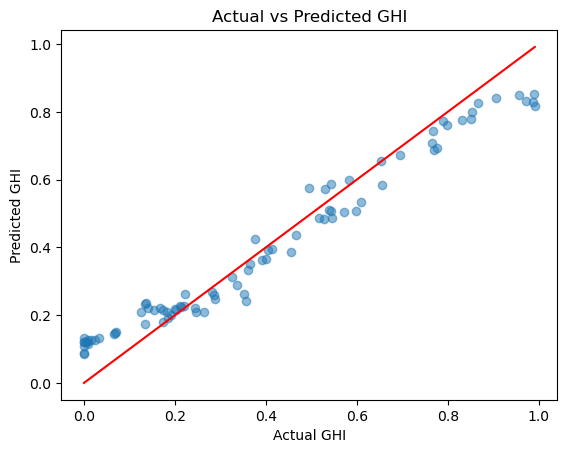

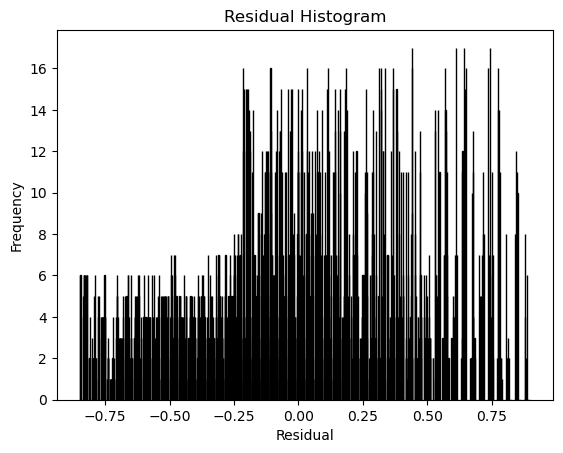

In [106]:
## Visualize Results

import matplotlib.pyplot as plt

# Scatter plot of actual vs. predicted GHI values
plt.scatter(y_test, predictions, alpha=0.5)
plt.xlabel('Actual GHI')
plt.ylabel('Predicted GHI')
plt.title('Actual vs Predicted GHI')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Diagonal line
plt.show()

# Plot residuals
residuals = y_test - predictions
plt.hist(residuals, bins=50, edgecolor='k')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Residual Histogram')
plt.show()


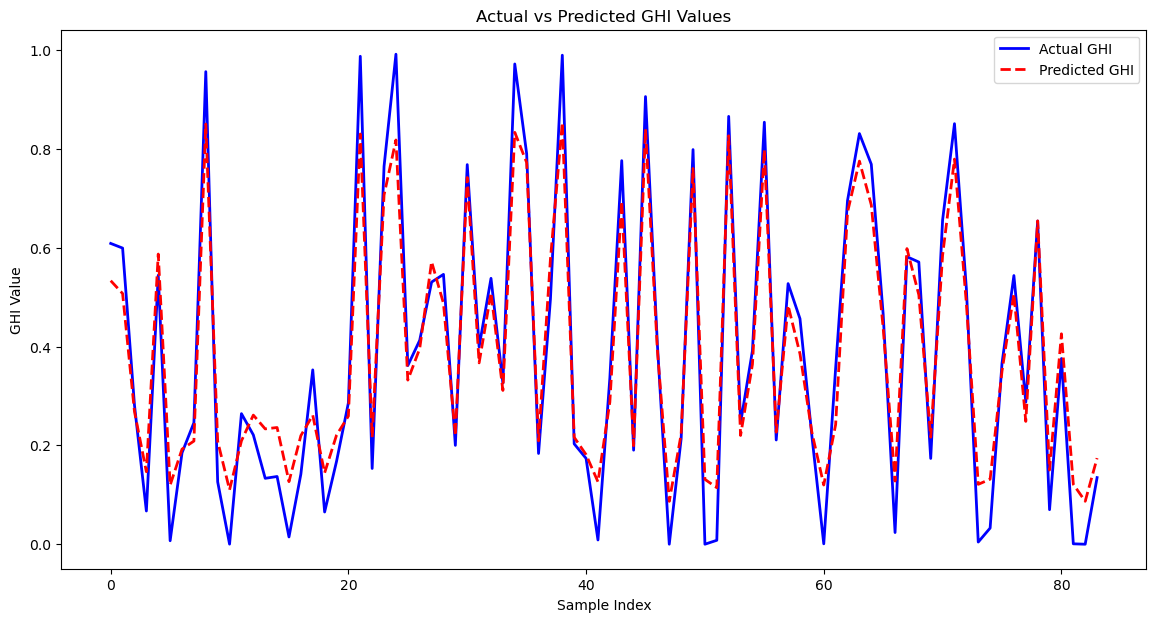

In [107]:
# Plot actual vs predicted GHI values
import matplotlib.pyplot as plt

# Plotting actual vs predicted GHI values
plt.figure(figsize=(14, 7))

# Plot actual GHI values
plt.plot(y_test, label='Actual GHI', color='blue', linewidth=2)

# Plot predicted GHI values
plt.plot(predictions, label='Predicted GHI', color='red', linestyle='--', linewidth=2)

# Adding labels and title
plt.xlabel('Sample Index')
plt.ylabel('GHI Value')
plt.title('Actual vs Predicted GHI Values')
plt.legend()

# Show the plot
plt.show()


In [108]:
# Save the model

import joblib

joblib.dump(model, 'models/ghi_prediction_model.pkl')

['models/ghi_prediction_model.pkl']

In [109]:
import numpy as np

# Predict GHI values using the model
predicted_ghi = model.predict(X_test).flatten() * max_ghi

actual_ghi = y_test * max_ghi

# Calculate the difference
difference = actual_ghi - predicted_ghi

# Create a DataFrame to store the results
results = pd.DataFrame({
    'Actual GHI': actual_ghi,
    'Predicted GHI': predicted_ghi,
    'Difference': difference
})


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


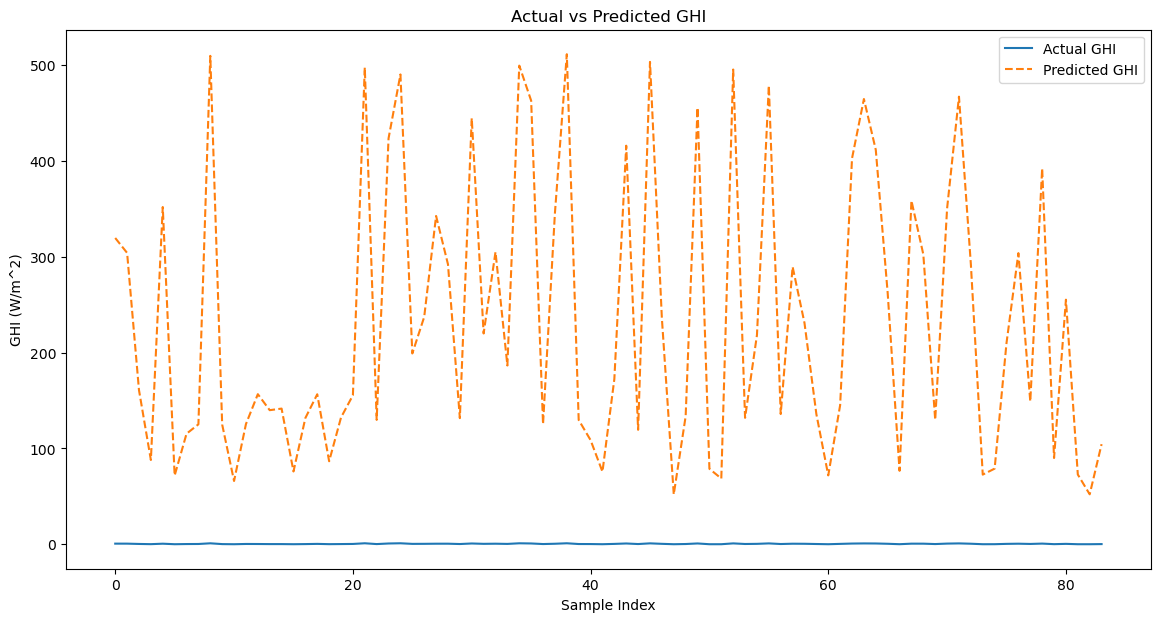

In [110]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
plt.plot(y_test, label='Actual GHI')
plt.plot(predicted_ghi.flatten(), label='Predicted GHI', linestyle='dashed')
plt.legend()
plt.title('Actual vs Predicted GHI')
plt.xlabel('Sample Index')
plt.ylabel('GHI (W/m^2)')
plt.show()


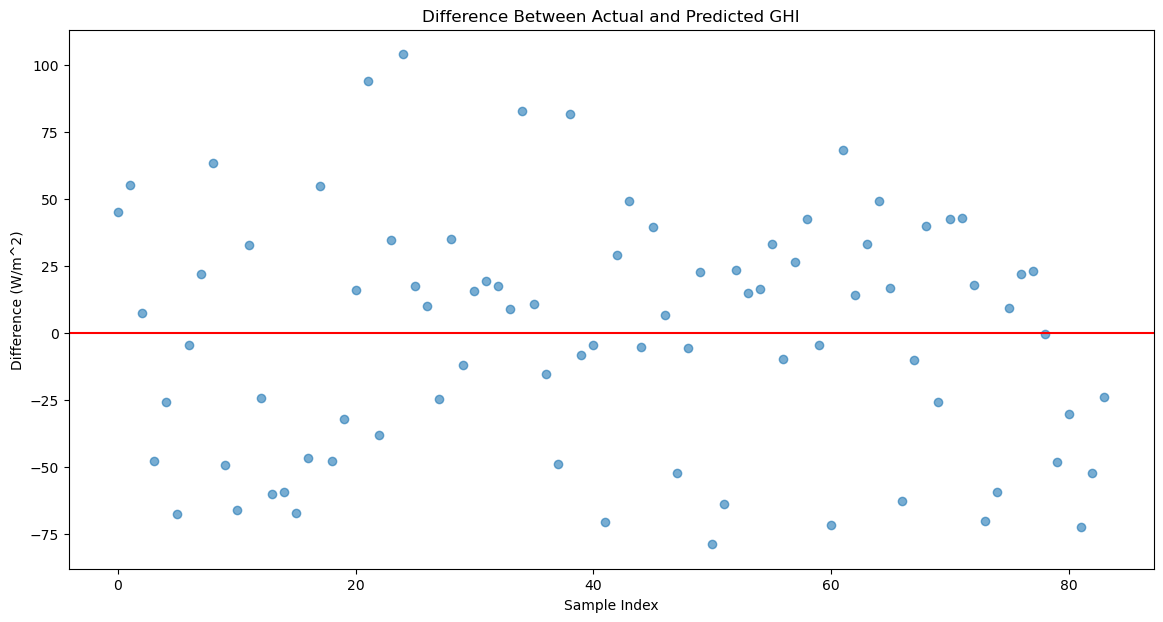

In [111]:
plt.figure(figsize=(14, 7))
plt.scatter(range(len(y_test)), difference, alpha=0.6)
plt.title('Difference Between Actual and Predicted GHI')
plt.xlabel('Sample Index')
plt.ylabel('Difference (W/m^2)')
plt.axhline(y=0, color='r', linestyle='-')
plt.show()


In [112]:
# Save the results to a CSV file
results.to_csv('data/actual_vs_predicted_ghi.csv', index=False)


In [113]:
#!pip install keras-tuner --upgrade


In [114]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

def build_model(hp):
    model = Sequential()
    model.add(Conv2D(filters=hp.Int('filters_1', min_value=32, max_value=128, step=32),
                     kernel_size=(3, 3), activation='relu', input_shape=(128, 128, 3)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    for i in range(hp.Int('num_layers', 1, 3)):
        model.add(Conv2D(filters=hp.Int(f'filters_{i+2}', min_value=32, max_value=128, step=32),
                         kernel_size=(3, 3), activation='relu'))
        model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(units=hp.Int('units', min_value=64, max_value=512, step=64), activation='relu'))
    model.add(Dropout(rate=hp.Float('dropout', min_value=0.0, max_value=0.5, step=0.1)))
    model.add(Dense(1, activation='linear'))

    model.compile(optimizer=tf.keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-4, 1e-3, 1e-2])),
                  loss='mean_absolute_error',
                  metrics=['mean_absolute_error'])
    return model


In [115]:
from kerastuner import RandomSearch
import tensorflow as tf

# Initialize the tuner
tuner = RandomSearch(
    build_model,
    objective='val_mean_absolute_error',
    max_trials=30,
    executions_per_trial=1,
    directory='hyperparameter_tuning',
    project_name='ghi_prediction'
)

# Prepare TensorFlow data
train_data = tf.data.Dataset.from_tensor_slices((X_train, y_train)).batch(32)
val_data = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(32)

# Perform the hyperparameter search
tuner.search(train_data, epochs=50, validation_data=val_data)

# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]


Reloading Tuner from hyperparameter_tuning\ghi_prediction\tuner0.json


In [ ]:
# Build the model with the best hyperparameters
best_model = tuner.hypermodel.build(best_hps)

# Train the model
history = best_model.fit(train_data, epochs=100, validation_data=val_data)

# Evaluate the model on validation data
val_loss, val_mae = best_model.evaluate(val_data)
print(f'Validation MAE: {val_mae}')

# Save the tuned model
#best_model.save('model/tuned_ghi_prediction_model.h5')


Epoch 1/100


C:\Users\obaidulhaque.sarker\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 10s 755ms/step - loss: 0.6786 - mean_absolute_error: 0.6786 - val_loss: 0.3966 - val_mean_absolute_error: 0.3966
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 8s 714ms/step - loss: 0.2792 - mean_absolute_error: 0.2792 - val_loss: 0.2464 - val_mean_absolute_error: 0.2464
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 8s 728ms/step - loss: 0.1840 - mean_absolute_error: 0.1840 - val_loss: 0.1381 - val_mean_absolute_error: 0.1381
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 8s 723ms/step - loss: 0.1260 - mean_absolute_error: 0.1260 - val_loss: 0.1232 - val_mean_absolute_error: 0.1232
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 8s 720ms/step - loss: 0.1059 - mean_absolute_error: 0.1059 - val_loss: 0.0812 - val_mean_absolute_error: 0.0812
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 8s 714ms/step - loss: 0.0793 - mean_absolute_error: 0.0793 - val_loss: 0.0729 - val_mean_absolute_error: 0.0729
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 8s 722ms/step - loss: 0.0672 - mean_absolute_error: 0.0672 - val_l

In [ ]:
import joblib

joblib.dump(best_model, 'models/tuned_ghi_prediction_model.pkl')

In [ ]:
import numpy as np

# Predict GHI values using the model
predicted_ghi = best_model.predict(X_test).flatten() * max_ghi

actual_ghi = y_test * max_ghi

# Calculate the difference
difference = actual_ghi - predicted_ghi

# Create a DataFrame to store the results
results = pd.DataFrame({
    'Actual GHI': actual_ghi,
    'Predicted GHI': predicted_ghi,
    'Difference': difference
})

In [ ]:
results.head()

In [ ]:
# Save the results to a CSV file
results.to_csv('data/best_actual_vs_predicted_ghi.csv', index=False)